# Introduction to computer vision with tensorflow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

### Get the data
From the Kaggle 101 dataset, we've modified the file to only use 2 classes with the modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb 

> We start with a smaller dataset so we can experiment quickly and figure what works or doesn't work before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-01 21:12:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.50M   238MB/s    in 0.4s    

2021-08-01 21:12:15 (238 MB/s) - ‘pizza_steak.zip.2’ saved [109579078/109579078]



In [ ]:
### Inspect the data
!ls pizza_steak

test  train


In [ ]:
import os

# Walk through the pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug  1 19:10 .
drwxr-xr-x 1 root root 4096 Aug  1 21:12 ..
-rw-r--r-- 1 root root 6148 Aug  1 21:12 .DS_Store
drwxr-xr-x 4 root root 4096 Aug  1 19:10 test
drwxr-xr-x 4 root root 4096 Aug  1 19:10 train


In [ ]:
# Another way to find how many images there are in a file
num_steak_imafes_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_imafes_train

750

In [ ]:
# Visualization code
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from there)
  target_folder = target_dir + '/' +target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image
  return img



['1105700.jpg']
Image shape: (512, 512, 3)


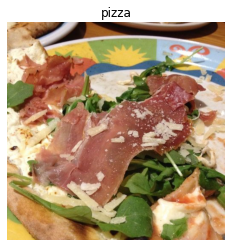

In [ ]:
# View a random image from the training data set
img = view_random_image(target_dir='pizza_steak/train', target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[243, 223, 188],
        [241, 223, 187],
        [240, 221, 188],
        ...,
        [ 81,  24,   0],
        [ 75,  18,   0],
        [ 69,  14,   0]],

       [[243, 225, 189],
        [242, 224, 188],
        [240, 221, 188],
        ...,
        [103,  44,  14],
        [ 90,  33,   3],
        [ 82,  25,   0]],

       [[242, 224, 188],
        [241, 223, 187],
        [239, 220, 187],
        ...,
        [121,  62,  30],
        [110,  51,  19],
        [101,  44,  14]],

       ...,

       [[246, 210,  90],
        [246, 210,  90],
        [245, 209,  89],
        ...,
        [115,  97,  87],
        [117, 103, 100],
        [109,  99,  98]],

       [[245, 209,  87],
        [245, 209,  87],
        [246, 210,  90],
        ...,
        [105,  85,  74],
        [104,  90,  87],
        [105,  93,  93]],

       [[245, 209,  87],
        [246, 210,  88],
        [247, 211,  91],
        ...,
        [110,  90,  7

In [ ]:
img.shape # returns width, height, color channels

(512, 512, 3)

In [ ]:
img/255.

array([[[0.95294118, 0.8745098 , 0.7372549 ],
        [0.94509804, 0.8745098 , 0.73333333],
        [0.94117647, 0.86666667, 0.7372549 ],
        ...,
        [0.31764706, 0.09411765, 0.        ],
        [0.29411765, 0.07058824, 0.        ],
        [0.27058824, 0.05490196, 0.        ]],

       [[0.95294118, 0.88235294, 0.74117647],
        [0.94901961, 0.87843137, 0.7372549 ],
        [0.94117647, 0.86666667, 0.7372549 ],
        ...,
        [0.40392157, 0.17254902, 0.05490196],
        [0.35294118, 0.12941176, 0.01176471],
        [0.32156863, 0.09803922, 0.        ]],

       [[0.94901961, 0.87843137, 0.7372549 ],
        [0.94509804, 0.8745098 , 0.73333333],
        [0.9372549 , 0.8627451 , 0.73333333],
        ...,
        [0.4745098 , 0.24313725, 0.11764706],
        [0.43137255, 0.2       , 0.0745098 ],
        [0.39607843, 0.17254902, 0.05490196]],

       ...,

       [[0.96470588, 0.82352941, 0.35294118],
        [0.96470588, 0.82352941, 0.35294118],
        [0.96078431, 0

### An end-to-end example
* Load images
* Preprocess images
* Build a CNN to find patterns in images
* Compile CNN
* Fit CNN

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # flow_from_directory creates data and labels automatically

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5733 - accuracy: 0.6960 - val_loss: 0.4226 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4334 - accuracy: 0.8013 - val_loss: 0.3417 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4258 - accuracy: 0.8087 - val_loss: 0.3297 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3663 - accuracy: 0.8433 - val_loss: 0.3436 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3398 - accuracy: 0.8547 - val_loss: 0.3502 - val_accuracy: 0.8560


In [ ]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 28090)           

### Trying a non-CNN model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFLow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 1.1796 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 2.6834 - accuracy: 0.6340 - val_loss: 2.2600 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 1.5759 - accuracy: 0.6540 - val_loss: 0.6285 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6370 - accuracy: 0.7633 - val_loss: 0.4493 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5357 - accuracy: 0.7713 - val_loss: 1.9320 - val_accuracy: 0.5060
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.7659 - accuracy: 0.7093 - val_loss: 0.5223 - val_accuracy: 0.7740


In [ ]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Model_3 Loss Curve (without CNN)')

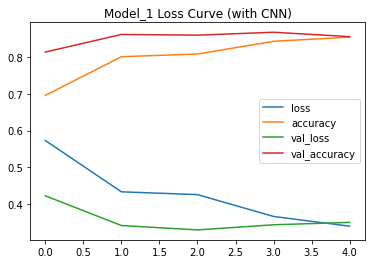

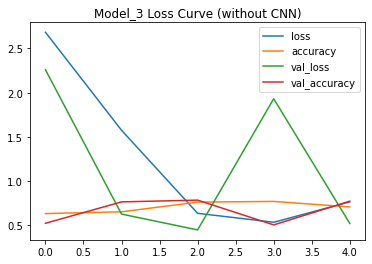

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_1.history).plot()
plt.title('Model_1 Loss Curve (with CNN)')
pd.DataFrame(history_3.history).plot()
plt.title('Model_3 Loss Curve (without CNN)')

>**Note**: You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

### Binary classification: Breaking it down
1. Become one with the data
2. Preprocess the data (mainly normalizing and turning data into batches)
3. Create a model (start with a baseline)
4. Fir the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data

['2396291.jpg']
Image shape: (512, 512, 3)
['3475936.jpg']
Image shape: (512, 512, 3)


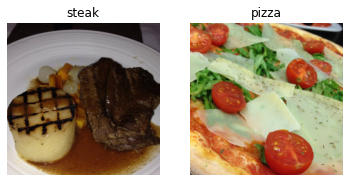

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza = view_random_image('pizza_steak/train', 'pizza')

### 2. Preprocess the data (Prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

**Turn data into batches**  
A batch is a small subset of data. Rather than look at all ~10,000 images at a time, a model may look at 32 at a time.  
It does this for a couple of reasons
1. 10,000 or more images may not fit into the memory of your processor.
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.



In [ ]:
!nvidia-smi

Sun Aug  1 21:14:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    33W / 250W |   4129MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next() # Get the 'next' batch of images
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)  # 1500 / 32 -> 46.875

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create baseline, a 3-layer CNN
tf.random.set_seed(42)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher equals more complex models)
         kernel_size=3, # the size of the sliding window going across the input
         strides=1, # the size of the step the sliding window takes across an input
         padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
         activation='relu',
         input_shape=(224,224,3)), # input layer, specify input shape
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_15 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.8641 - accuracy: 0.6327 - val_loss: 0.6091 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4793 - accuracy: 0.7647 - val_loss: 0.3911 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3618 - accuracy: 0.8507 - val_loss: 0.3591 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3061 - accuracy: 0.8807 - val_loss: 0.3891 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.2189 - accuracy: 0.9280 - val_loss: 0.3974 - val_accuracy: 0.8260


### 5. Evaluating the model

Text(0.5, 1.0, 'model_4 loss curve')

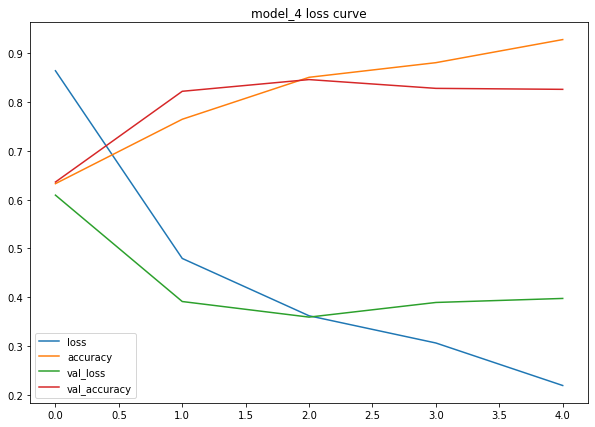

In [ ]:
# loss curve
pd.DataFrame(history_4.history).plot(figsize=(10,7))
plt.title('model_4 loss curve')

In [ ]:
# plot the validation and training curve separately
def plot_loss_curves(history):
  '''
  Returns separate loss curves for training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

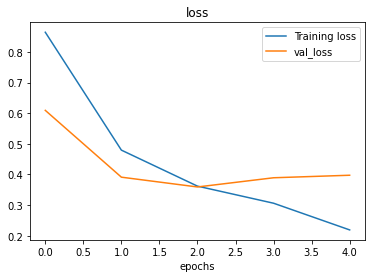

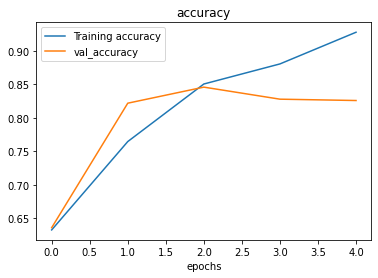

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjusting the model parameters
Fitting a ML model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...


In [ ]:
# Create the model (going to be the new baseline)
model_5 = Sequential([
  Conv2D(10, 3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6204 - accuracy: 0.6593 - val_loss: 0.4774 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4718 - accuracy: 0.7827 - val_loss: 0.3895 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4542 - accuracy: 0.7907 - val_loss: 0.4087 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4204 - accuracy: 0.8173 - val_loss: 0.3595 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3901 - accuracy: 0.8253 - val_loss: 0.3427 - val_accuracy: 0.8600


In [ ]:
model_5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6760)            

In [ ]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_15 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


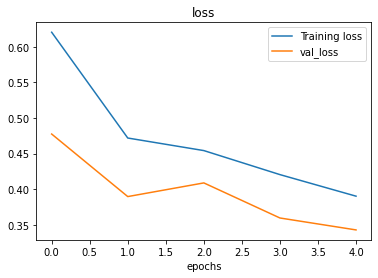

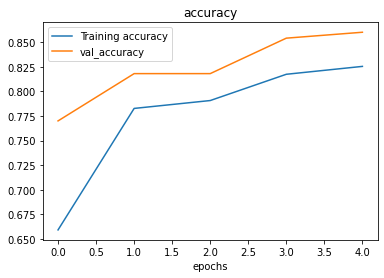

In [ ]:
plot_loss_curves(history_5)

> Reducing overfitting is also known as **regularization**.

### Data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
 
# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Data augmentation** is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [ ]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demo purpose only

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> Data augmentation is usually **only** performed on the training data. Using `ImageDataGenerator` bulit-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Visualize augmented data
tf.random.set_seed(42)
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images), can replace augmented_labels with _

showing image number 29


(-0.5, 223.5, 223.5, -0.5)

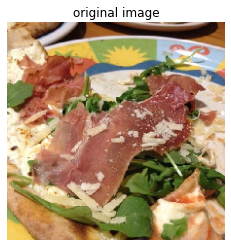

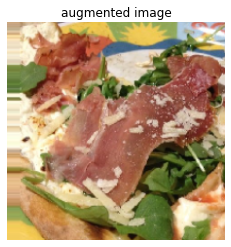

In [ ]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32)
print(f'showing image number {random_number}')
plt.imshow(images[random_number])
plt.title(f'original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'augmented image')
plt.axis(False)

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 448ms/step - loss: 0.7158 - accuracy: 0.4380 - val_loss: 0.6927 - val_accuracy: 0.5160
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6935 - accuracy: 0.4320 - val_loss: 0.6928 - val_accuracy: 0.5480
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6946 - accuracy: 0.4900 - val_loss: 0.6929 - val_accuracy: 0.5840
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6931 - accuracy: 0.4693 - val_loss: 0.6919 - val_accuracy: 0.5440
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6921 - accuracy: 0.5640 - val_loss: 0.6878 - val_accuracy: 0.5420


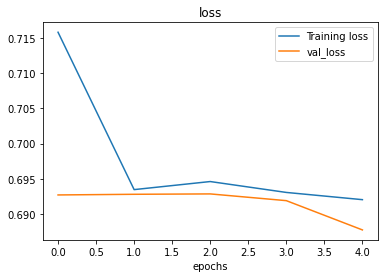

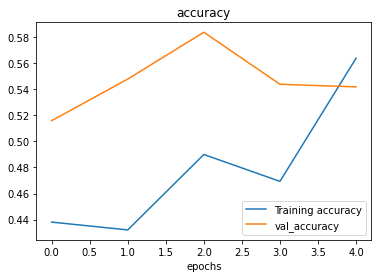

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # shuffle augmented data
tf.random.set_seed(42)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Augmented training data
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 449ms/step - loss: 0.6489 - accuracy: 0.6240 - val_loss: 0.5597 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5893 - accuracy: 0.6747 - val_loss: 0.4808 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5471 - accuracy: 0.7253 - val_loss: 0.3822 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4982 - accuracy: 0.7600 - val_loss: 0.3480 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 21s 445ms/step - loss: 0.4883 - accuracy: 0.7680 - val_loss: 0.3439 - val_accuracy: 0.8540


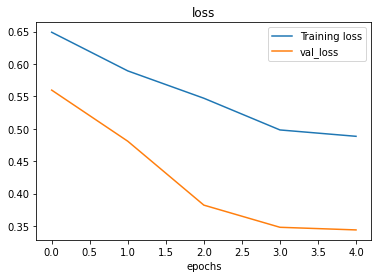

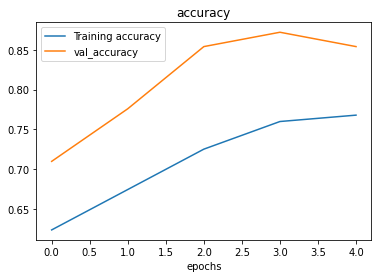

In [ ]:
plot_loss_curves(history_7)

> When shuffling our training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time insetead of just pizza then steak)

### 7. Repeat until satisfied
Since we've already beaten the baseline, there are a few things we could try to continue to improve our model

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer
* Find an ideal learning rate
* Get mode data
* Use **transfer learning** to leverage what another image model had learn and adjust it for our own use case

In [ ]:
tf.random.set_seed(42)

model_8 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
model_8.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6038 - accuracy: 0.6693 - val_loss: 0.4953 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5451 - accuracy: 0.7273 - val_loss: 0.3775 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5197 - accuracy: 0.7560 - val_loss: 0.4940 - val_accuracy: 0.7260
Epoch 4/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5103 - accuracy: 0.7527 - val_loss: 0.3753 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4983 - accuracy: 0.7513 - val_loss: 0.3522 - val_accuracy: 0.8460


#### Making a prediction with our trained modle on our custom data

--2021-08-01 21:22:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-08-01 21:22:12 (33.5 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

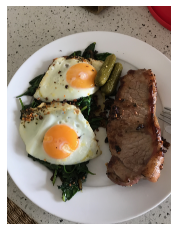

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads and image from filenamem turns it into tensor and reshapes
  it to (img_shape, img_shape, colour_channel)
  '''
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
pred = model_8.predict(expanded_steak)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# Index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports and image located at filename, makes a prediction with model
  and plots the image with the predicted class at the title
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

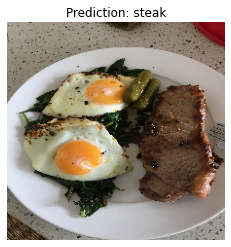

In [ ]:
# Test the model on a custom image
pred_and_plot(model_8, '03-steak.jpeg')

--2021-08-01 21:22:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2021-08-01 21:22:15 (54.8 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



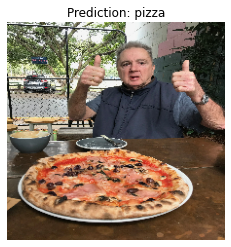

In [ ]:
# Download another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_1, '03-pizza-dad.jpeg')

In [ ]:
!nvidia-smi

Sun Aug  1 21:22:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    34W / 250W |   4129MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Multi-class image classification
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust the different hyperparameters and improve the model (try to beat baseline and reduce overfitting)
7. Repeat

### Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-08-01 21:22:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   257MB/s    in 1.9s    

2021-08-01 21:22:18 (257 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filename in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)}, directories and {len(filenames)}, in "{dirpath}"')

There are 2, directories and 250, in "10_food_classes_all_data"
There are 10, directories and 250, in "10_food_classes_all_data/train"
There are 0, directories and 250, in "10_food_classes_all_data/train/ice_cream"
There are 0, directories and 250, in "10_food_classes_all_data/train/chicken_curry"
There are 0, directories and 250, in "10_food_classes_all_data/train/ramen"
There are 0, directories and 250, in "10_food_classes_all_data/train/hamburger"
There are 0, directories and 250, in "10_food_classes_all_data/train/grilled_salmon"
There are 0, directories and 250, in "10_food_classes_all_data/train/chicken_wings"
There are 0, directories and 250, in "10_food_classes_all_data/train/sushi"
There are 0, directories and 250, in "10_food_classes_all_data/train/fried_rice"
There are 0, directories and 250, in "10_food_classes_all_data/train/steak"
There are 0, directories and 250, in "10_food_classes_all_data/train/pizza"
There are 10, directories and 250, in "10_food_classes_all_data/tes

In [ ]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [ ]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2562929.jpg']
Image shape: (288, 512, 3)


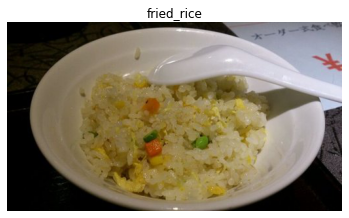

In [ ]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a CNN model (start with a baseline)

In [ ]:
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 184ms/step - loss: 2.1101 - accuracy: 0.2336 - val_loss: 1.9230 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.8341 - accuracy: 0.3651 - val_loss: 1.8429 - val_accuracy: 0.3520
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.5135 - accuracy: 0.4925 - val_loss: 1.9766 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 41s 176ms/step - loss: 0.9992 - accuracy: 0.6760 - val_loss: 2.3206 - val_accuracy: 0.3204
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.4849 - accuracy: 0.8497 - val_loss: 3.0281 - val_accuracy: 0.2948


### 5. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 3.0281 - accuracy: 0.2948


[3.0280725955963135, 0.2948000133037567]

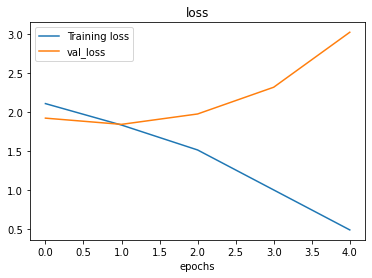

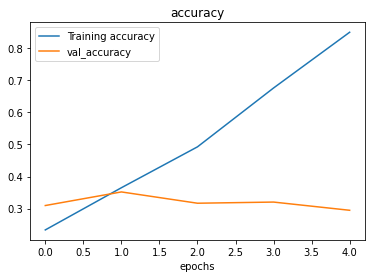

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history=history_9)

> **The model is overfitting** because it is getting great results on the **training data** but fails to generalize well on the **validation data**

### 6. Adjust the hyperparameters to beat baseline and reduce overfitting
We can try:
* **Get more data** 
* **Simplify the model**
* **Data augmentation**
* **Transfer learning**

In [ ]:
model_9.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 28090)           

In [ ]:
# Try simplifying the model
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
model_10.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [ ]:
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 174ms/step - loss: 2.0940 - accuracy: 0.2548 - val_loss: 1.9528 - val_accuracy: 0.3124
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.7399 - accuracy: 0.4100 - val_loss: 1.8779 - val_accuracy: 0.3548
Epoch 3/5
235/235 [==============================] - 42s 177ms/step - loss: 1.3770 - accuracy: 0.5513 - val_loss: 1.9313 - val_accuracy: 0.3500
Epoch 4/5
235/235 [==============================] - 40s 172ms/step - loss: 0.9381 - accuracy: 0.7133 - val_loss: 2.2434 - val_accuracy: 0.3092
Epoch 5/5
235/235 [==============================] - 42s 179ms/step - loss: 0.5302 - accuracy: 0.8531 - val_loss: 2.5808 - val_accuracy: 0.3012


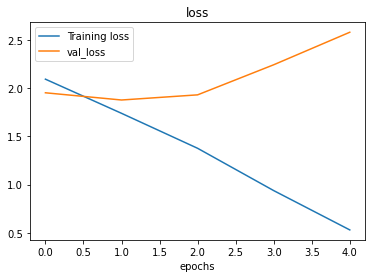

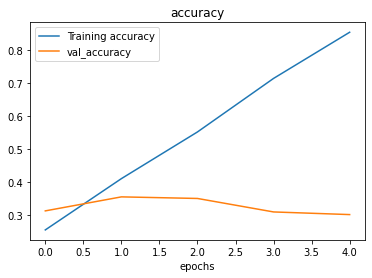

In [ ]:
plot_loss_curves(history=history_10)

In [ ]:
model_10.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [ ]:
# The above model didn't improve because we still had too many params

### Trying data augmentation (and visualize)

In [ ]:
test_dir

'10_food_classes_all_data/test'

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
 
# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training data
Found 7500 images belonging to 10 classes.
Non-augmented training data
Found 7500 images belonging to 10 classes.
Non-augmented test data:
Found 2500 images belonging to 10 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images), can replace augmented_labels with _

In [ ]:
# Create another model but fit on augmented data
model_11 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the cloned model
model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_11 = model_11.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 109s 462ms/step - loss: 2.2787 - accuracy: 0.1473 - val_loss: 2.1540 - val_accuracy: 0.2064
Epoch 2/10
235/235 [==============================] - 107s 456ms/step - loss: 2.1936 - accuracy: 0.1815 - val_loss: 2.0849 - val_accuracy: 0.2360
Epoch 3/10
235/235 [==============================] - 111s 471ms/step - loss: 2.1392 - accuracy: 0.2233 - val_loss: 1.9567 - val_accuracy: 0.3024
Epoch 4/10
235/235 [==============================] - 107s 456ms/step - loss: 2.0799 - accuracy: 0.2641 - val_loss: 1.9782 - val_accuracy: 0.2904
Epoch 5/10
235/235 [==============================] - 108s 461ms/step - loss: 2.0339 - accuracy: 0.2780 - val_loss: 1.8491 - val_accuracy: 0.3488
Epoch 6/10
235/235 [==============================] - 107s 456ms/step - loss: 1.9902 - accuracy: 0.2973 - val_loss: 1.8372 - val_accuracy: 0.3604
Epoch 7/10
235/235 [==============================] - 109s 465ms/step - loss: 1.9854 - accuracy: 0.3031 - val_loss: 1.9172 -

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 3.0281 - accuracy: 0.2948


[3.02807354927063, 0.2948000133037567]

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.7655 - accuracy: 0.3768


[1.765483021736145, 0.376800000667572]

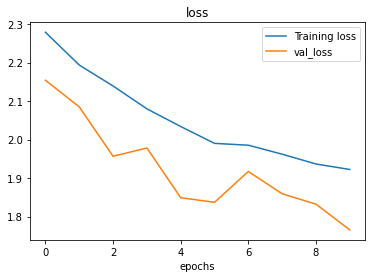

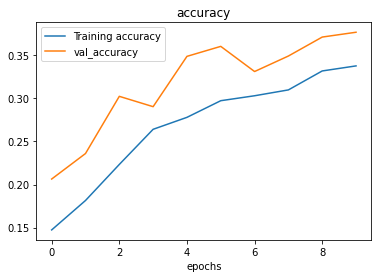

In [ ]:
plot_loss_curves(history_11)

### 7. Repeat until satisfied

### Making predictions

In [ ]:
!wget https://www.tasteofhome.com/wp-content/uploads/2018/01/Chocolate-Crunch-Ice-Cream_exps31814_CW950599D43C_RMS.jpg

--2021-08-01 22:34:00--  https://www.tasteofhome.com/wp-content/uploads/2018/01/Chocolate-Crunch-Ice-Cream_exps31814_CW950599D43C_RMS.jpg
Resolving www.tasteofhome.com (www.tasteofhome.com)... 104.18.20.39, 104.18.21.39, 2606:4700::6812:1427, ...
Connecting to www.tasteofhome.com (www.tasteofhome.com)|104.18.20.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177093 (173K) [image/jpeg]
Saving to: ‘Chocolate-Crunch-Ice-Cream_exps31814_CW950599D43C_RMS.jpg’

Chocolate-Crunch-Ic 100%[===================>] 172.94K  --.-KB/s    in 0.02s   

2021-08-01 22:34:00 (9.94 MB/s) - ‘Chocolate-Crunch-Ice-Cream_exps31814_CW950599D43C_RMS.jpg’ saved [177093/177093]



(-0.5, 1199.5, 1199.5, -0.5)

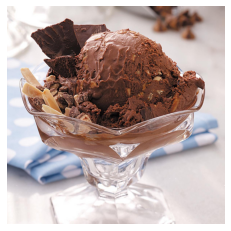

In [ ]:
ice_cream = mpimg.imread('ice_cream.jpg')
plt.imshow(ice_cream)
plt.axis(False)

In [ ]:
ice_cream = load_and_prep_image('ice_cream.jpg')
expanded_ice_cream = tf.expand_dims(ice_cream, axis=0)
pred = model_11.predict(expanded_ice_cream)
class_names[pred.argmax()]

'steak'

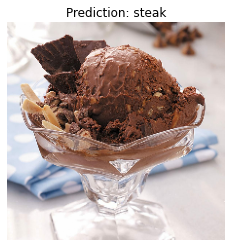

In [ ]:
pred_and_plot(model_11, 'ice_cream.jpg')

### Saving and loading our model

In [ ]:
# Save a model
model_11.save('saved_trained_model_11')

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [ ]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model('saved_trained_model_11')
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.7655 - accuracy: 0.3768


[1.7654821872711182, 0.376800000667572]

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.7655 - accuracy: 0.3768


[1.765482783317566, 0.376800000667572]